# **FASE IV: MODELADO (NO-SUPERVISADO)**

In [19]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
import sys
warnings.filterwarnings('ignore')

sys.setrecursionlimit(10**6)

monopoly = pd.read_parquet('../monopoly_cleaned_parquet')

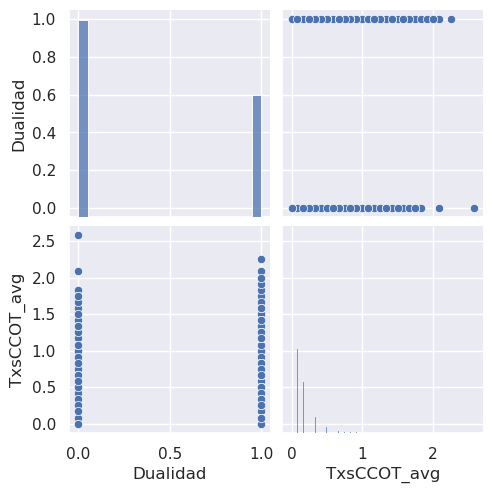

In [2]:
# Pair-plot
sns.set()
sns.pairplot(data=monopoly ,vars=["Dualidad", "TxsCCOT_avg"])
plt.show()

## **CLUSTERING JERÁRQUICO**

In [3]:
monopoly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subsegmento     51121 non-null  float64
 1   Sexo            51121 non-null  float64
 2   Region          51121 non-null  float64
 3   Edad            51121 non-null  float64
 4   Renta           51121 non-null  float64
 5   Antiguedad      51121 non-null  float64
 6   Internauta      51121 non-null  float64
 7   Adicional       51121 non-null  float64
 8   Dualidad        51121 non-null  float64
 9   Monoproducto    51121 non-null  float64
 10  Ctacte          51121 non-null  float64
 11  Consumo         51121 non-null  float64
 12  Hipotecario     51121 non-null  float64
 13  Debito          51121 non-null  float64
 14  CambioPin       51121 non-null  float64
 15  Cuentas         51121 non-null  float64
 16  TC              51121 non-null  float64
 17  CUPO_L1         51121 non-null 

In [4]:
#'Dualidad' y 'TxsCCOT_avg'
X = monopoly.iloc[:, [8, 45]].values

### **Modelo N°1**

In [16]:
from scipy.cluster.hierarchy import linkage

# Matriz de enlace
linkage_matrix = linkage(X, method='average')
# Especifica la distancia a utlizar en cada paso del método

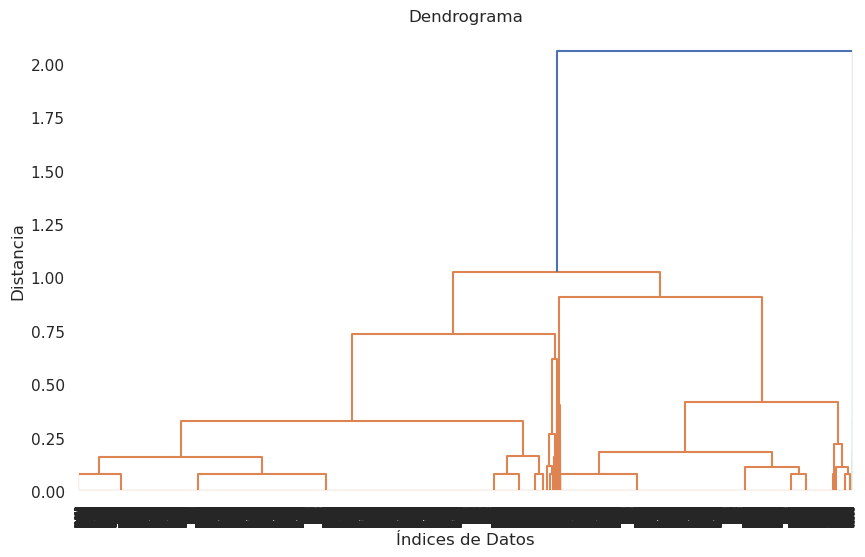

In [20]:
from scipy.cluster.hierarchy import dendrogram

#Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix) #grafico de dendrograma
plt.title('Dendrograma')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

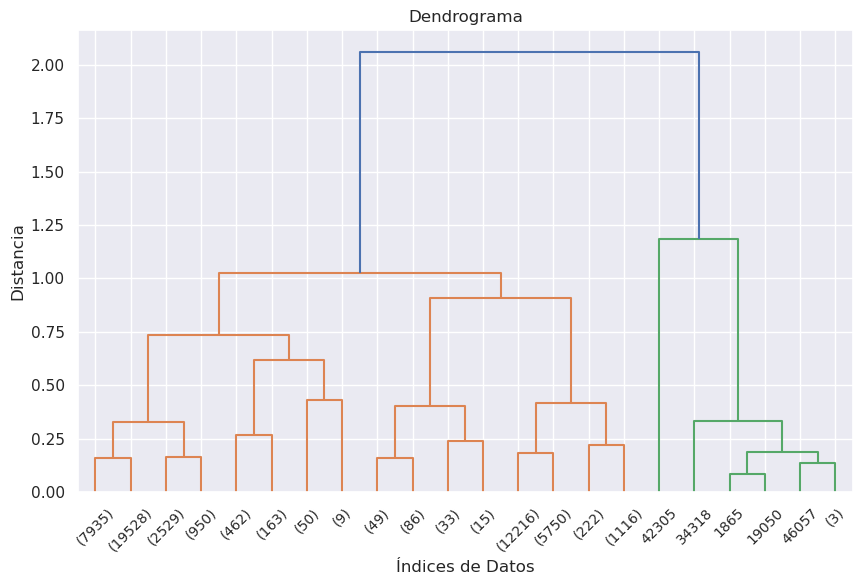

In [21]:
#Dendrograma
plt.figure(figsize=(10, 6))

# Se ajusta el dendograma en 4 niveles para que sea más legible
dendrogram(linkage_matrix, truncate_mode='level', p=4)

# Se dibuja una linea en la distancia 120 para mostrar el corte
plt.axhline(3, c='r')

plt.title('Dendrograma')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

In [22]:
#'Dualidad' y 'TxsCCOT_avg'
X = monopoly.iloc[:, [8,45]].values

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar clustering jerárquico aglomerativo
cj_1 = AgglomerativeClustering(n_clusters=4)
Y_hat = cj_1.fit_predict(X)

In [24]:
from sklearn.metrics import silhouette_score

# Silhouette Score
SScj_1 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_1)

Silhouette Score: 0.701791421234141


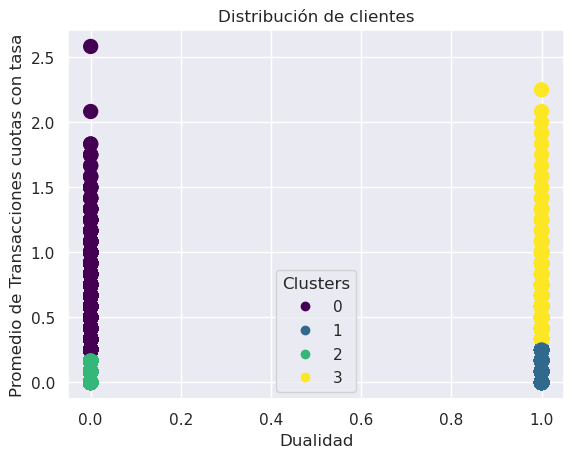

In [25]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Dualidad')
plt.ylabel('Promedio de Transacciones cuotas con tasa')
plt.title('Distribución de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

### **Modelo N°2**

In [26]:
from sklearn.cluster import AgglomerativeClustering

cj_2 = AgglomerativeClustering(affinity='euclidean', linkage='single',n_clusters=4)

In [27]:
Y_hat = cj_2.fit_predict(X)

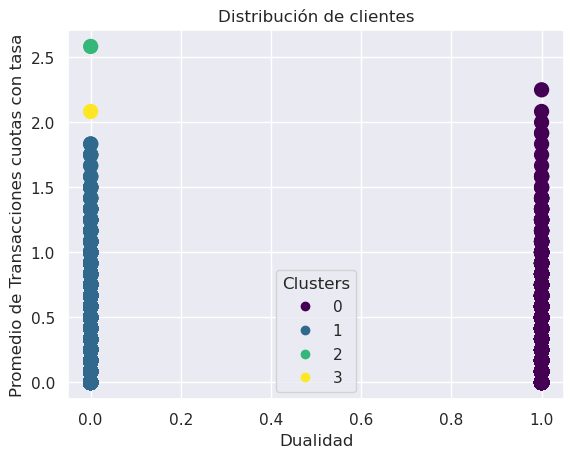

In [28]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Dualidad')
plt.ylabel('Promedio de Transacciones cuotas con tasa')
plt.title('Distribución de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

SScj_2 = silhouette_score(X, Y_hat, metric='euclidean')


print("Silhouette Score:", SScj_2)

Silhouette Score: 0.8436702747195537


### **Modelo N°3**

In [58]:
from sklearn.cluster import AgglomerativeClustering

cj_3 = AgglomerativeClustering(affinity='euclidean', linkage='average', distance_threshold=2, n_clusters=None)
Y_hat = cj_3.fit_predict(X)

In [59]:
# Número de clusters
num_clusters = len(set(Y_hat))
print(f"Número de clusters: {num_clusters}")

Número de clusters: 2


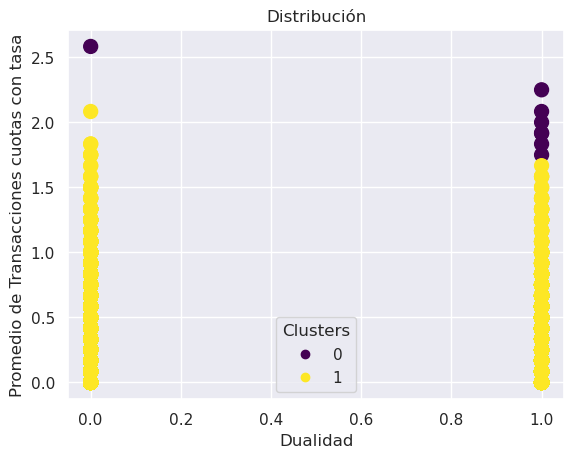

In [60]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Dualidad')
plt.ylabel('Promedio de Transacciones cuotas con tasa')
plt.title('Distribución')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [61]:
SScj_3 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_3)

Silhouette Score: 0.7146879844092897


### **Modelo N°4**

In [62]:
#'Edad' y 'Renta'
X =monopoly.iloc[:, [8,37]].values

In [63]:
# Aplicar clustering jerárquico aglomerativo
cj_4 = AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=4)
Y_hat = cj_4.fit_predict(X)

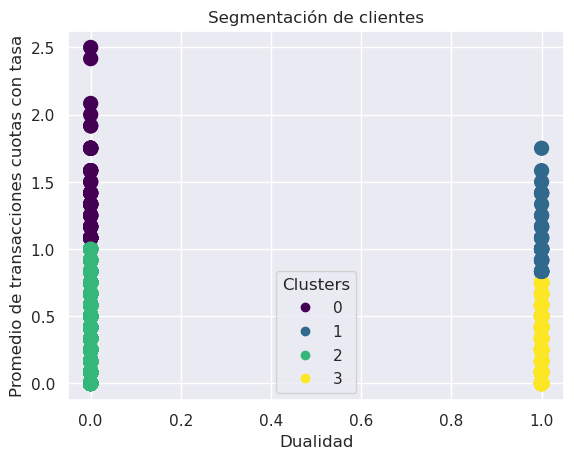

In [64]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Dualidad')
plt.ylabel('Promedio de transacciones cuotas con tasa')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [65]:
SScj_4 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_4)

Silhouette Score: 0.9335452931618404


### **Modelo N°5**

In [66]:
#'Dualidad', 'TxsAn_avg' y 'TxsCCOT_avg'
X = monopoly.iloc[:, [8,37,45]].values

In [67]:
# Aplicar clustering jerárquico aglomerativo
cj_5 = AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=4)
Y_hat = cj_5.fit_predict(X)

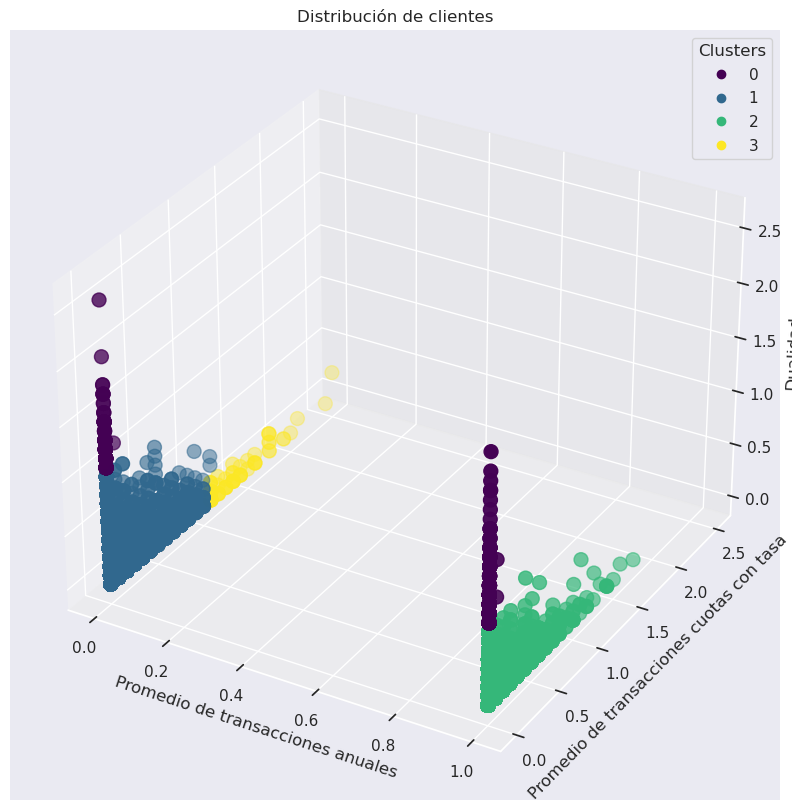

In [68]:
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y_hat, cmap='viridis', s=100)

ax.set_xlabel('Promedio de transacciones anuales')
ax.set_ylabel('Promedio de transacciones cuotas con tasa')
ax.set_zlabel('Dualidad')

plt.title('Distribución de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [69]:
SScj_5 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SScj_5)

Silhouette Score: 0.7980326119280526


In [70]:
tabla = {'Modelo': [cj_1, cj_2, cj_3, cj_4, cj_5],
         'Silhouette Score': [SScj_1, SScj_2, SScj_3, SScj_4, SScj_5]}

tabla = pd.DataFrame(tabla, columns = ['Modelo', 'Silhouette Score'])
tabla

,Modelo,Silhouette Score
0,AgglomerativeClustering(n_clusters=4),0.701791
1,"AgglomerativeClustering(affinity='euclidean', ...",0.843670
2,"AgglomerativeClustering(affinity='euclidean', ...",0.714688
3,"AgglomerativeClustering(affinity='manhattan', ...",0.933545
4,"AgglomerativeClustering(affinity='manhattan', ...",0.798033


In [ ]:
import joblib

# Save the goddamn model (please)
# joblib.dump(, '')